# Práctica Guiada de Laboratorio 10 - Curso IA 2025-1 Grupo 1 EPISW
# Ejercicio propuesto - c-means
### Prof. Rolando A. Maguiña Pérez

# Introducción
En la presente práctica, a realizarse el 19 de Junio del 2025, se abordará el problema denominado `Segmentación de clientes` mediante la técnica  del  `Machine Learning` denominada `c-means`. Luego de la presentación del problema, se plantearán algunas preguntas que los alumnos deberán resolver.

En esas actividades se usará la biblioteca de aprendizaje automático para el lenguaje de programación Python llamada  [scikit-learn](https://scikit-learn.org/stable/).

**Nota: esta Práctica podrá desarrollarse en grupos de tres alumnos.**

# Segmentación de clientes
## Planteamiento del problema
El objetivo de este problema es segmentar a los clientes de un distribuidor mayorista en función de su gasto anual en diversas categorías de productos, como leche, comestibles, región, etc.

Los datos están alojados en el repositorio de aprendizaje automático de la Universidad de Irving y consta de 440 muestras. Cada registro de la base de datos tiene ocho atributos numéricos.

1. Channel
2. Region
3. Fresh
4. Milk
5. Grocery
6. Frozen
7. Detergents_Paper
8. Delicassen

El archivo con el dataset es `Wholesale customers data.csv`

### Carga de los módulos/bibliotecas y la data
**Importe las librerias que generalmente usa para el análisis de datos.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

### Obtener los datos


**Lea el archivo `Wholesale customers data.csv`.**

In [6]:
data= pd.read_csv('Wholesale customers data.csv')

**Revise los primeros registros de los datos**

In [7]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Tenemos los detalles de gasto de los clientes en diferentes productos, como leche, comestibles, congelados, detergentes, etc. Ahora, debemos segmentar a los clientes según la información proporcionada. Antes de hacerlo, extraigamos algunas estadísticas relacionadas con los datos:

**Aplique los métodos info() y describe() en los datos.**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Aquí, observamos que hay mucha variación en la magnitud de los datos. Variables como Channel y Region tienen una magnitud baja, mientras que variables como Fresh, Milk, Groceries, etc. tienen una magnitud mayor.

Dado que c-means es un algoritmo basado en la distancia, esta diferencia de magnitud puede crear un problema. Por lo tanto, primero igualemos la magnitud de todas las variables. Escriba el código que permita hacer esto.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


## Creación del clúster K Means

¡Ahora es el momento de crear las etiquetas del Cluster!

**Importar KMeans de SciKit Learn.**

In [13]:
from sklearn.cluster import KMeans

**Crea una instancia de un modelo de c-means con 2 clústeres.**
Use el algoritmo de inicialización denominado `k-means++`

In [17]:
kmeans_init = KMeans(n_clusters=2, init='k-means++', random_state=0)

Se han inicializado dos clústeres y notar que la inicialización no ha sido aleatoria. Se ha utilizado la inicialización `k-means++`, que generalmente produce mejores resultados.

**Ajuste el modelo a todos los datos sin excepción alguna.**

In [20]:
kmeans_init.fit(scaled_data)

C:\Users\eduda\.conda\envs\unmsm\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

**¿Cuáles son los centros del grupo de los vectores?**

In [21]:
centros = kmeans_init.cluster_centers_
print("Centros de los clústeres:\n", centros)

Centros de los clústeres:
 [[-0.64104498 -0.05158101  0.12366094 -0.33628412 -0.42241436  0.12449116
  -0.43800028 -0.09097771]
 [ 1.43292407  0.11529873 -0.27641856  0.75169392  0.94422034 -0.27827435
   0.97905944  0.20336194]]


**Estudiar e implementar un procedimiento para determinar el número óptimo de clústeres. Sugerencia: use el denominado método del codo.**

In [ ]:
#3

**Aplique ahora el algoritmo usado para el problema de la predicción de préstamo (notebook PGL10_IA_2025-1_EPISW_c-means_OK.ipynb) al caso de segmentación de clientes. Compare los resultados que obtiene con los que obtuvo con sklearn**

Solución del ejercicio

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
# Cargar datos
data = pd.read_csv('Wholesale customers data.csv')
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


Variables seleccionadas: Fresh y Milk
Visualización inicial de los datos:


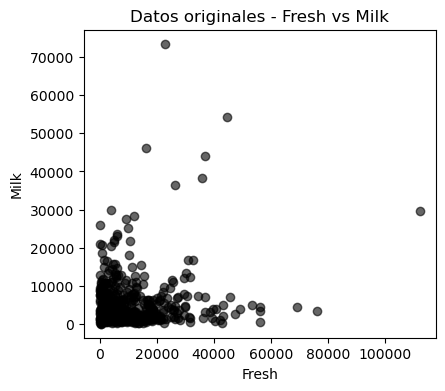

In [13]:
# Seleccionamos dos variables
X = data[["Fresh", "Milk"]].copy()

print("Variables seleccionadas: Fresh y Milk")
print("Visualización inicial de los datos:")

# Visualizar datos iniciales
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X["Fresh"], X["Milk"], c='black', alpha=0.6)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Datos originales - Fresh vs Milk')
plt.show()

Centroides iniciales seleccionados aleatoriamente:
     Fresh   Milk             1             2             3  Cluster
240  22096   3575   3032.067323  17277.155182  24356.742883        1
286   7149   2247  11987.742021   4345.496927  38941.483706        2
37   15168  10556   8002.317436  11140.669211  29542.836762        1


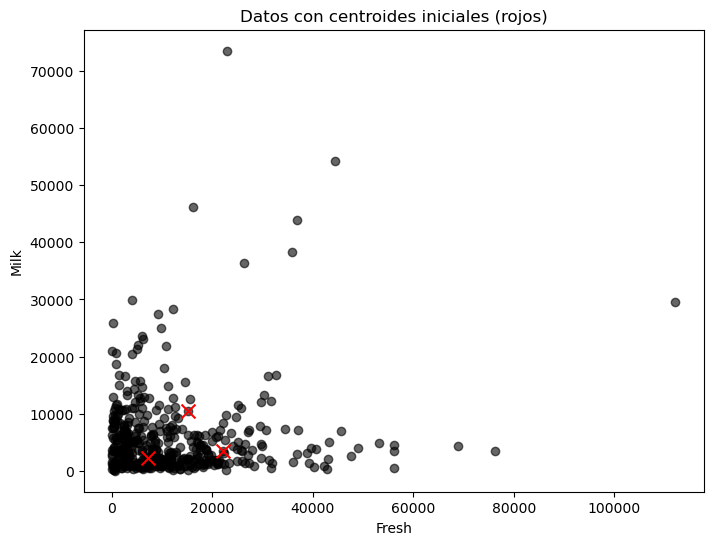

In [16]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster
K = 3  # Número de clusters

# Select random observation as centroids
Centroids = (X.sample(n=K))
print(f"Centroides iniciales seleccionados aleatoriamente:")
print(Centroids)

plt.figure(figsize=(8, 6))
plt.scatter(X["Fresh"], X["Milk"], c='black', alpha=0.6)
plt.scatter(Centroids["Fresh"], Centroids["Milk"], c='red', s=100, marker='x')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Datos con centroides iniciales (rojos)')
plt.show()

In [15]:
# Step 3, 4, 5 - Implementación del algoritmo iterativo
print("Ejecutando algoritmo C-means...")

diff = 1
j = 0
iteration = 0

while(diff != 0):
    XD = X.copy()
    i = 1
    
    # Calcular distancias a cada centroide
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Fresh"] - row_d["Fresh"])**2
            d2 = (row_c["Milk"] - row_d["Milk"])**2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        X[i] = ED
        i = i + 1
    
    # Asignar cada punto al cluster más cercano
    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i + 1
        C.append(pos)
    
    X["Cluster"] = C
    
    # Recalcular centroides
    Centroids_new = X.groupby(["Cluster"]).mean()[["Fresh","Milk"]]
    
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (Centroids_new['Fresh'] - Centroids['Fresh']).sum() + (Centroids_new['Milk'] - Centroids['Milk']).sum()
        print(f"Iteración {iteration}: diff = {diff}")
        if abs(diff) < 1e-6:  # Criterio de convergencia
            diff = 0
    
    Centroids = X.groupby(["Cluster"]).mean()[["Fresh","Milk"]]
    iteration += 1
    
    if iteration > 100:  # Evitar bucle infinito
        break

print(f"\nAlgoritmo convergió después de {iteration} iteraciones")
print(f"Centroides finales:")
print(Centroids)

Ejecutando algoritmo C-means...
Iteración 1: diff = 4224.212468040124
Iteración 2: diff = 4130.506520547051
Iteración 3: diff = 2421.62989173787
Iteración 4: diff = 1665.777068236197
Iteración 5: diff = 3080.522528091699
Iteración 6: diff = 1137.9883451243745
Iteración 7: diff = 910.5823467856062
Iteración 8: diff = 223.96152148978035
Iteración 9: diff = 182.76899239632075
Iteración 10: diff = 0.0

Algoritmo convergió después de 11 iteraciones
Centroides finales:
                Fresh          Milk
Cluster                            
1        19063.945736   3566.100775
2         4992.688172   6019.752688
3        44622.562500  12838.093750


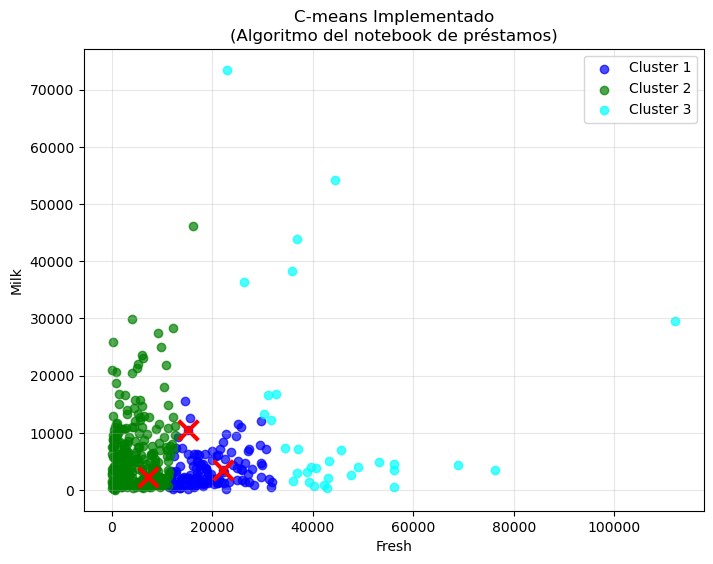

In [17]:
# Visualizar resultados del algoritmo C-means implementado
color = ['blue', 'green', 'cyan']
plt.figure(figsize=(8, 6))

for k in range(K):
    cluster_data = X[X["Cluster"] == k+1]
    plt.scatter(cluster_data["Fresh"], cluster_data["Milk"], c=color[k], alpha=0.7, label=f'Cluster {k+1}')

plt.scatter(Centroids["Fresh"], Centroids["Milk"], c='red', s=200, marker='x', linewidth=3)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('C-means Implementado\n(Algoritmo del notebook de préstamos)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [23]:
# Aplicar sklearn K-Means a los datos originales
from sklearn.cluster import KMeans

# Usar los mismos datos que C-means implementado
X_original = data[["Fresh", "Milk"]].copy()

# K-Means sklearn con datos originales
kmeans_original = KMeans(n_clusters=3, random_state=42)
sklearn_labels_original = kmeans_original.fit_predict(X_original)
sklearn_centroids_original = kmeans_original.cluster_centers_

X_original['Cluster_sklearn'] = sklearn_labels_original

print("Centroides sklearn (datos originales):")
for i, centroid in enumerate(sklearn_centroids_original):
    print(f"Cluster {i}: Fresh={centroid[0]:.0f}, Milk={centroid[1]:.0f}")

Centroides sklearn (datos originales):
Cluster 0: Fresh=5387, Milk=5687
Cluster 1: Fresh=20733, Milk=5317
Cluster 2: Fresh=48734, Milk=9377


C:\Users\Lenovo\anaconda3\envs\tarea2_entorno\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


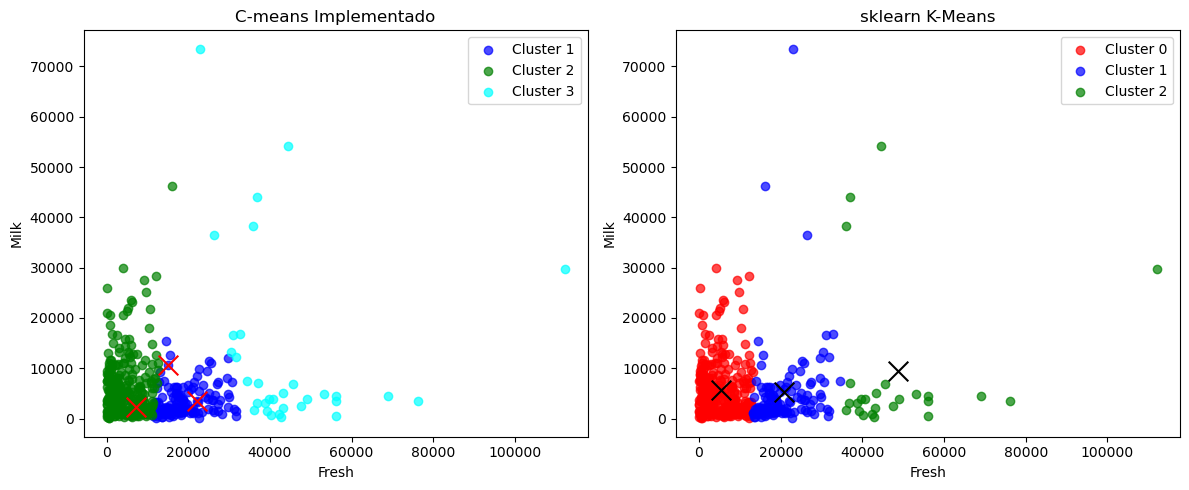

In [24]:
# Comparación visual lado a lado
plt.figure(figsize=(12, 5))

# C-means implementado
plt.subplot(1, 2, 1)
colors = ['blue', 'green', 'cyan']
for k in range(3):
    cluster_data = X[X["Cluster"] == k+1]
    plt.scatter(cluster_data["Fresh"], cluster_data["Milk"], c=colors[k], alpha=0.7, label=f'Cluster {k+1}')
plt.scatter(Centroids["Fresh"], Centroids["Milk"], c='red', s=200, marker='x')
plt.title('C-means Implementado')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend()

# sklearn K-Means
plt.subplot(1, 2, 2)
colors = ['red', 'blue', 'green']
for k in range(3):
    cluster_data = X_original[X_original["Cluster_sklearn"] == k]
    plt.scatter(cluster_data["Fresh"], cluster_data["Milk"], c=colors[k], alpha=0.7, label=f'Cluster {k}')
plt.scatter(sklearn_centroids_original[:, 0], sklearn_centroids_original[:, 1], c='black', s=200, marker='x')
plt.title('sklearn K-Means')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

# Calcular métricas
silhouette_cmeans = silhouette_score(X[['Fresh', 'Milk']], X['Cluster'])
silhouette_sklearn = silhouette_score(X_original[['Fresh', 'Milk']], sklearn_labels_original)

# Distribución de clusters
cmeans_dist = X['Cluster'].value_counts().sort_index()
sklearn_dist = pd.Series(sklearn_labels_original).value_counts().sort_index()

print("COMPARACIÓN DE RESULTADOS:")
print("-" * 40)
print(f"Silhouette Score:")
print(f"  C-means:  {silhouette_cmeans:.4f}")
print(f"  sklearn:  {silhouette_sklearn:.4f}")

print(f"\nDistribución de puntos:")
print("C-means:", cmeans_dist.values)
print("sklearn:", sklearn_dist.values)

COMPARACIÓN DE RESULTADOS:
----------------------------------------
Silhouette Score:
  C-means:  0.4478
  sklearn:  0.4821

Distribución de puntos:
C-means: [129 279  32]
sklearn: [296 119  25]


In [26]:
print("DIFERENCIAS PRINCIPALES:")
print("• C-means: Implementación manual, inicialización aleatoria")
print("• sklearn: Algoritmo optimizado, K-means++")

if silhouette_sklearn > silhouette_cmeans:
    print(f"\n→ sklearn obtuvo mejor calidad (+{silhouette_sklearn-silhouette_cmeans:.4f})")
else:
    print(f"\n→ C-means implementado obtuvo mejor calidad (+{silhouette_cmeans-silhouette_sklearn:.4f})")

DIFERENCIAS PRINCIPALES:
• C-means: Implementación manual, inicialización aleatoria
• sklearn: Algoritmo optimizado, K-means++

→ sklearn obtuvo mejor calidad (+0.0343)


## Instrucciones para el envío de la solución

La solución de la "Práctica Guiada de Laboratorio 10 - IA 2025-1 G1 EPISW" podrá enviarse al correo electrónico rmaguinacursos@gmail.com, hasta las 23:59 h del Domingo 22 de Junio del 2025, en un archivo con extensión .ipynb.

El documento deberá tener las sgtes características:

- Nombre del archivo: solPGL10_IA_2025-1_G1_EPISW_nombre-apellidos_alumno1_..._nombre-apellidos_alumno3.ipynb.

- Todas las preguntas de la Práctica deben responderse en un cuaderno computacional interactivo (**Sugerencia**: obtener una copia de este documento y desarrollar en éllas las respectivas soluciones); la solución a cada pregunta debe registrarse en una celda debajo del planteamiento de la misma, mencionando explícitamente como subtítulo: "Solución del ejercicio n", donde "n" corresponde al número del ejercicio.